In [1]:
import statistics as st
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

## Load the data

In [2]:
data = pd.read_csv("Data.csv")
data.head()

,Year,Total,0,1 - 9,10 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+
0,1996,130.4,4.6,9.0,10.2,18.7,66.3,210.6,523.6,1114.5,2105.5,2955.3
1,1997,134.1,3.6,9.4,11.6,18.5,66.8,211.9,519.4,1125.6,2083.3,3073.3
2,1998,134.0,4.3,7.4,9.3,17.4,66.0,202.2,497.3,1092.4,2066.5,3042.8
3,1999,135.3,3.4,7.2,9.0,16.2,65.7,201.7,494.3,1057.5,2032.9,3050.6
4,2000,142.2,3.6,6.9,8.8,17.8,65.9,206.3,499.6,1064.3,2091.1,3242.8


## Plot the data

<Axes: xlabel='Year', ylabel='Death Rate per 100000 pop.'>

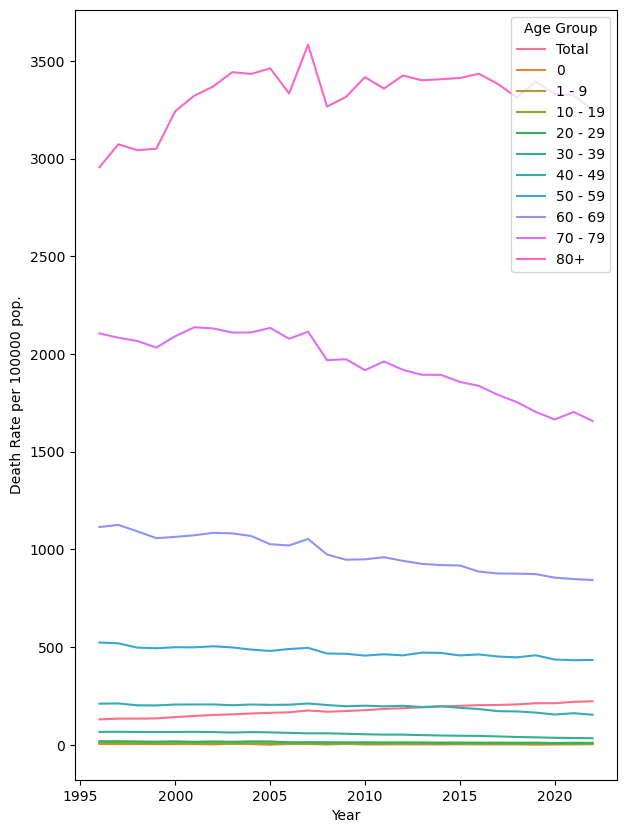

In [3]:
data_plot = data.melt(id_vars=['Year'], var_name='Age Group', value_name='Death Rate per 100000 pop.')
plt.figure(figsize=(7, 10))
sb.lineplot(data=data_plot, x='Year', y='Death Rate per 100000 pop.', hue='Age Group')

In [4]:
data.describe()

,Year,Total,0,1 - 9,10 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2009.000000,176.322222,2.985185,6.229630,7.440741,13.770370,54.285185,193.259259,475.040741,979.977778,1951.440741,3323.644444
std,7.937254,28.692914,1.212342,1.438967,1.580472,2.925986,11.178265,17.839762,25.172471,91.826950,159.391143,144.522946
min,1996.000000,130.400000,0.600000,3.800000,5.100000,9.100000,33.900000,153.900000,433.200000,843.400000,1657.500000,2955.300000
25%,2002.500000,154.450000,2.100000,4.950000,6.450000,11.450000,46.100000,186.300000,457.650000,902.250000,1847.150000,3289.500000
50%,2009.000000,175.900000,2.500000,6.400000,7.200000,13.000000,56.600000,200.500000,470.300000,960.300000,1968.600000,3358.100000
75%,2015.500000,201.350000,3.750000,7.050000,8.600000,16.700000,65.250000,205.950000,496.750000,1066.500000,2098.300000,3414.700000
max,2022.000000,222.700000,5.700000,9.400000,11.600000,18.700000,66.800000,211.900000,523.600000,1125.600000,2136.800000,3582.700000


## Test on Normal Distribution

In [5]:
alpha_N = 0.01
prd = [range(0,9), range(9,18), range(18,27)]
is_norm = np.ones((11, 3), dtype=bool)

print("Age:\t\t1996 - 2004\t2005 - 2013\t2014 - 2022")
for i, age in enumerate(data.columns[1:]):
    print(age, end='\t\t')
    for j, period in enumerate(prd):
        if stats.shapiro(data[age][period]).pvalue > alpha_N:
            print("Normal", end='\t\t')
        else:
            print("Non-normal", end='\t')
            is_norm[i][j] = 0
    print('\n')

Age:		1996 - 2004	2005 - 2013	2014 - 2022
Total		Normal		Normal		Normal		

0		Normal		Normal		Normal		

1 - 9		Normal		Normal		Non-normal	

10 - 19		Normal		Normal		Normal		

20 - 29		Normal		Non-normal	Normal		

30 - 39		Normal		Normal		Normal		

40 - 49		Normal		Normal		Normal		

50 - 59		Normal		Normal		Normal		

60 - 69		Normal		Normal		Normal		

70 - 79		Normal		Normal		Normal		

80+		Normal		Normal		Normal		



## Variances and Levene's test

In [6]:
def testv(i, age, s, t, alpha):
    if is_norm[i][s] and is_norm[i][t]:
        _, p_val = stats.f_oneway(data[age][prd[s]], data[age][prd[t]])
    else:
        _, p_val = stats.levene(data[age][prd[s]], data[age][prd[t]])
    if p_val >= alpha:
        print(f"{p_val:.4f}, =\t\t", end='\t')
        return True
    else:
        print(f"{p_val:.4f}, !=\t\t", end='\t')
        return False

In [7]:
alpha_v = 0.05
is_v_eq = np.zeros((11, 3), dtype=bool)

print("Age:\t1996 - 2004 vs. 2005 - 2013\t2005 - 2013 vs. 2014 - 2022\t1996 - 2004 vs. 2014 - 2022")
for i, age in enumerate(data.columns[1:]):
    print(age, end='\t\t')
    is_v_eq[i][0] = testv(i, age, 0, 1, alpha_v/3)
    is_v_eq[i][1] = testv(i, age, 1, 2, alpha_v/3)
    is_v_eq[i][2] = testv(i, age, 0, 2, alpha_v/3)
    print('\n')

Age:	1996 - 2004 vs. 2005 - 2013	2005 - 2013 vs. 2014 - 2022	1996 - 2004 vs. 2014 - 2022
Total		0.0000, !=			0.0000, !=			0.0000, !=			

0		0.0529, =			0.2562, =			0.0007, !=			

1 - 9		0.0155, !=			0.5644, =			0.9572, =			

10 - 19		0.0001, !=			0.0456, =			0.0000, !=			

20 - 29		0.8789, =			0.6128, =			0.0000, !=			

30 - 39		0.0000, !=			0.0000, !=			0.0000, !=			

40 - 49		0.0481, =			0.0001, !=			0.0000, !=			

50 - 59		0.0001, !=			0.0035, !=			0.0000, !=			

60 - 69		0.0000, !=			0.0000, !=			0.0000, !=			

70 - 79		0.0060, !=			0.0000, !=			0.0000, !=			

80+		0.0192, =			0.3563, =			0.0400, =			



## ANOVA and Kruskal–Wallis tests

In [8]:
alpha_m = 0.05
is_m_eq = np.zeros((11), dtype=bool)

print("Age:\t\tp-value\t\tMeans")
for i, age in enumerate(data.columns[1:]):
    if is_norm[i][0] and is_norm[i][1] and is_norm[i][2] and is_v_eq[i][0] and is_v_eq[i][1] and is_v_eq[i][2]:
        _, p_val = stats.f_oneway(data[age][prd[0]], data[age][prd[1]], data[age][prd[2]])
    else:
        _, p_val = stats.kruskal(data[age][prd[0]], data[age][prd[1]], data[age][prd[2]])
        
    print(f"{age}\t\t{p_val:.4f}", end='\t\t')
    if p_val >= alpha_m:
        print("equal", end='')
        is_m_eq[i] = 1
    else:
        print("different", end='')
    print('\n')

Age:		p-value		Means
Total		0.0000		different

0		0.0083		different

1 - 9		0.0007		different

10 - 19		0.0001		different

20 - 29		0.0000		different

30 - 39		0.0000		different

40 - 49		0.0001		different

50 - 59		0.0001		different

60 - 69		0.0000		different

70 - 79		0.0001		different

80+		0.0125		different



## Pooled and Welch's t-tests

In [9]:
def testm(P_W, age, s, t, alpha):
    _, p_val = stats.ttest_ind(data[age][prd[s]], data[age][prd[t]],\
                               equal_var = P_W, alternative = 'greater')
    if p_val >= alpha:
        _, p_val = stats.ttest_ind(data[age][prd[s]], data[age][prd[t]],\
                                   equal_var = P_W, alternative = 'less')
        if p_val >= alpha:
            _, p_val = stats.ttest_ind(data[age][prd[s]], data[age][prd[t]],\
                                   equal_var = P_W, alternative = 'two-sided')
            print(f"{p_val:.4f}, =\t\t", end='\t')
            
        else:
            print(f"{p_val:.4f}, <\t\t", end='\t')
    else:
        print(f"{p_val:.4f}, >\t\t", end='\t')

In [10]:
alpha_t = 0.1

print("Age:\t1996 - 2004 vs. 2005 - 2013\t2005 - 2013 vs. 2014 - 2022\t1996 - 2004 vs. 2014 - 2022")
for i, age in enumerate(data.columns[1:]):
    print(age, end='\t\t')
    testm(is_v_eq[i][0] and is_norm[i][0] and is_norm[i][1],age, 0, 1, alpha_t/3)
    testm(is_v_eq[i][1] and is_norm[i][1] and is_norm[i][2],age, 1, 2, alpha_t/3)
    testm(is_v_eq[i][2] and is_norm[i][0] and is_norm[i][2],age, 0, 2, alpha_t/3)
    print('\n')

Age:	1996 - 2004 vs. 2005 - 2013	2005 - 2013 vs. 2014 - 2022	1996 - 2004 vs. 2014 - 2022
Total		0.0000, <			0.0000, <			0.0000, <			

0		0.0265, >			0.2562, =			0.0004, >			

1 - 9		0.0087, >			0.0016, >			0.0000, >			

10 - 19		0.0001, >			0.0228, >			0.0000, >			

20 - 29		0.0000, >			0.0005, >			0.0000, >			

30 - 39		0.0001, >			0.0000, >			0.0000, >			

40 - 49		0.0241, >			0.0001, >			0.0001, >			

50 - 59		0.0001, >			0.0018, >			0.0000, >			

60 - 69		0.0000, >			0.0000, >			0.0000, >			

70 - 79		0.0050, >			0.0000, >			0.0000, >			

80+		0.0096, <			0.3563, =			0.0200, <			

